# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [3]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [4]:
# ImageDataGenerator can do data normalization, arugementation (rotation)
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 40
)

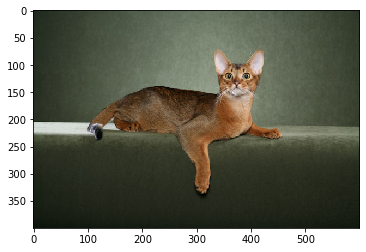

In [5]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


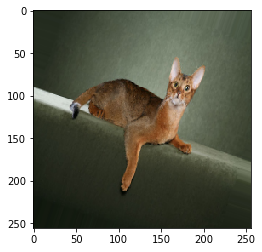

In [6]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100,0,100],
    height_shift_range = [-50,50]
)

Found 1 images belonging to 1 classes.


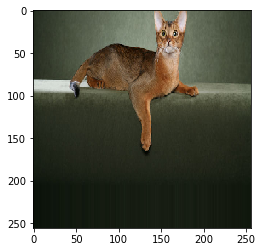

In [12]:
# flow from directory helps in creating iterator over images in the given directory
x, y = next(generator.flow_from_directory('images', batch_size=1))
# plotting the example generated
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


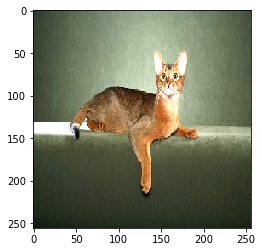

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.5,2.0)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


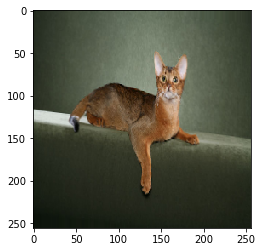

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


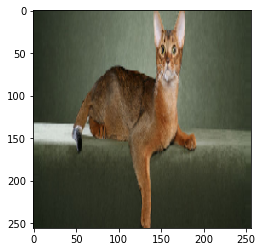

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    #zoom_range = [.5, 1.5]
    zoom_range = .5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

In [28]:
x.mean()

76.27177

Found 1 images belonging to 1 classes.


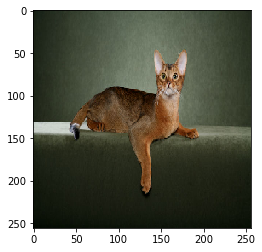

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [31]:
x.mean()

60.284687

In [32]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


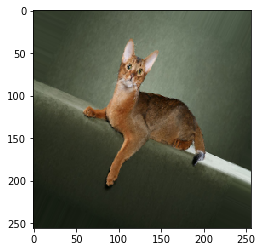

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range =30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# x_mean = x_train.mean()
# x_std = x_train.str()
# x_train_norm= (x_train - x_mean) / x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center =True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [39]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.6686987 0.7789077 [[6]]
120.70756512369792


### Samplewise

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

5.9604645e-08 0.9999999 [[7]]


# Task 10: Rescale and Preprocessing Function

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    #preprocessing_function = 244,244,3
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [44]:
,x, y = next(generator.flow(x_train, y_train, batch_size=1,))

(array([[[[-0.3250921 , -0.31068128, -0.22421646],
          [ 1.1159884 ,  0.9862911 ,  1.1159884 ],
          [ 1.0871667 ,  0.5971994 ,  0.6548426 ],
          ...,
          [ 1.2312747 ,  1.1880424 ,  1.288918  ],
          [ 1.216864  ,  1.1736315 ,  1.288918  ],
          [ 1.2312747 ,  1.1880424 ,  1.288918  ]],
 
         [[-0.41155693, -0.42596772, -0.3395029 ],
          [ 1.0871667 ,  1.0151126 ,  1.0727559 ],
          [ 1.1015775 ,  0.6116102 ,  0.6116102 ],
          ...,
          [ 1.2024531 ,  1.1592207 ,  1.2600963 ],
          [ 1.2312747 ,  1.1880424 ,  1.288918  ],
          [ 1.2456856 ,  1.2024531 ,  1.3033288 ]],
 
         [[ 0.75571823,  0.64043176,  0.75571823],
          [ 1.1303991 ,  1.14481   ,  1.1592207 ],
          [ 1.0295235 ,  0.95746946,  0.87100464],
          ...,
          [ 1.2312747 ,  1.1880424 ,  1.288918  ],
          [ 1.2600963 ,  1.216864  ,  1.3033288 ],
          [ 1.2312747 ,  1.1880424 ,  1.2745072 ]],
 
         ...,
 
         [[ 

In [45]:
print(x.mean(), x.std(), y)

5.9604645e-08 0.9999999 [[7]]


# Task 11: Using in Model Training

In [47]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    #preprocessing_function = 244,244,3
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, 
        input_shape = (32,32,3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')])
model.compile(
    loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [51]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs = 1,steps_per_epoch = 10
    

)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 15s 2s/step - loss: 3.1039 - accuracy: 0.1344
